4.Machine Learning Models

4.1 ARIMA (AutoRegressive Integrated Moving Average)

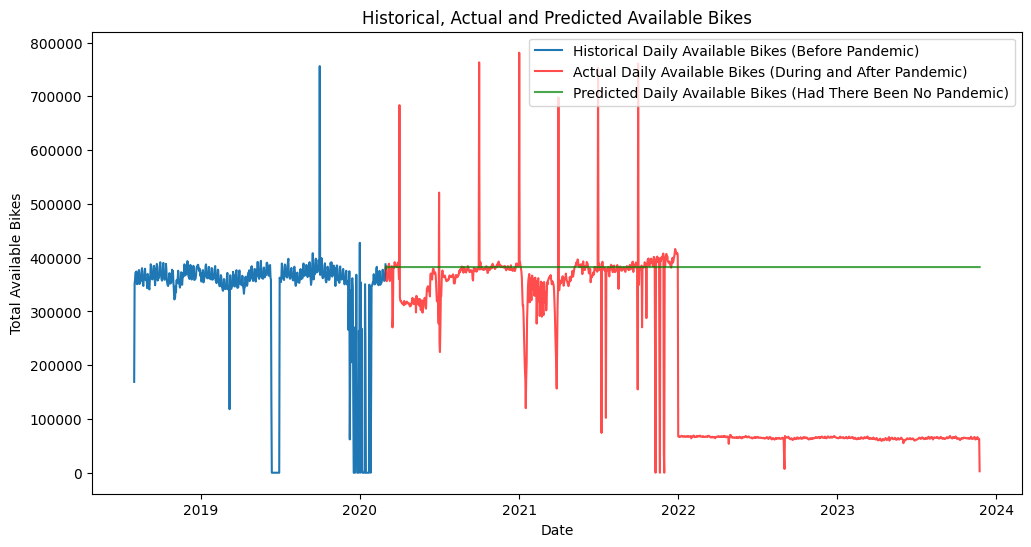

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'], index_col='DATE')
    return data

# Load the datasets
before_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')
during_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv')
after_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')

# We'll aggregate data by day to get the total available bikes per day
daily_data_before = before_pandemic_data['AVAILABLE BIKES'].resample('D').sum()
daily_data_during_after = pd.concat([during_pandemic_data, after_pandemic_data])['AVAILABLE BIKES'].resample('D').sum()

# Fit an ARIMA model
# The order (p, d, q) parameters should be determined using grid search or domain knowledge
# For simplicity, we are assuming 1,1,1 for the order
arima_model = ARIMA(daily_data_before, order=(1, 1, 1))
arima_result = arima_model.fit()

# Predict what the values would have been after the pandemic started
# Replace '2020-03-01' and '2023-11-24' with the actual dates of your during-pandemic and after-pandemic data
predicted_values = arima_result.predict(start='2020-03-01', end='2023-11-24')

# Plot the historical, actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(daily_data_before, label='Historical Daily Available Bikes (Before Pandemic)')
plt.plot(daily_data_during_after, label='Actual Daily Available Bikes (During and After Pandemic)', color='red', alpha=0.7)
plt.plot(predicted_values, label='Predicted Daily Available Bikes (Had There Been No Pandemic)', color='green', alpha=0.7)
plt.title('Historical, Actual and Predicted Available Bikes')
plt.xlabel('Date')
plt.ylabel('Total Available Bikes')
plt.legend()
plt.show()


4.2 SARIMA (Seasonal ARIMA)

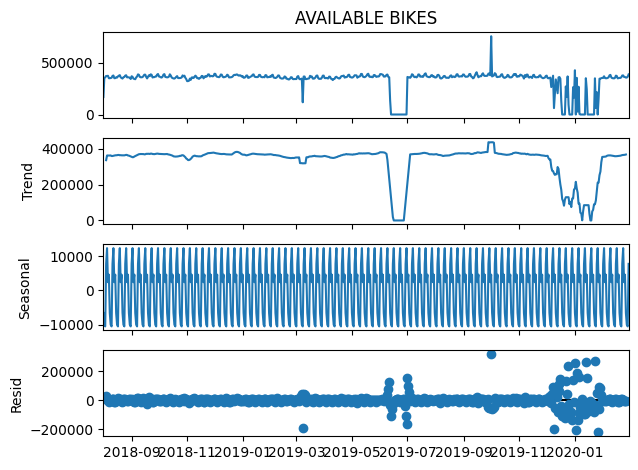

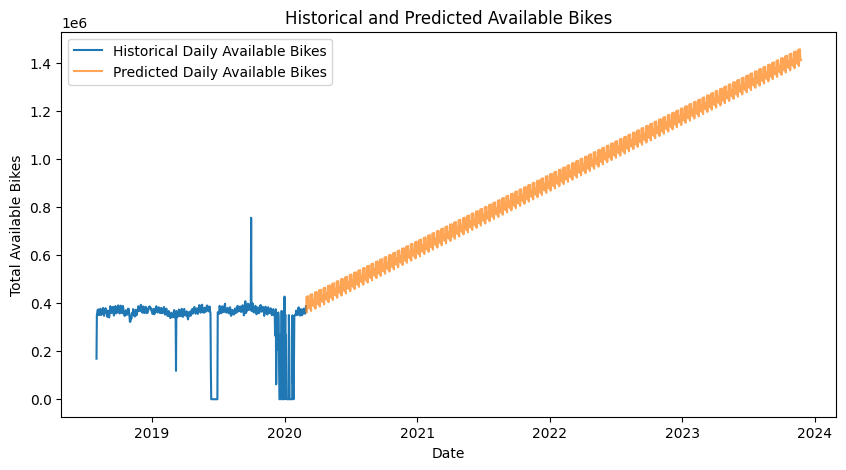

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'], index_col='DATE')
    return data

# Load the before-pandemic dataset
before_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')

# We'll aggregate data by day to get the total available bikes per day
daily_data = before_pandemic_data['AVAILABLE BIKES'].resample('D').sum()

# Decompose the time series to understand its components
decomposition = seasonal_decompose(daily_data, model='additive')
fig = decomposition.plot()
plt.show()

# Fit a SARIMA model
# The order (p, d, q) and seasonal_order (P, D, Q, S) parameters should be determined using grid search or domain knowledge
# For simplicity, we are assuming 1,1,1 for non-seasonal order and 1,1,1,12 for seasonal order
sarima_model = SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Predict what the values would have been after the pandemic started
# Replace '2020-03-01' and '2023-11-24' with the actual dates of your during-pandemic and after-pandemic data
predicted_values = sarima_result.predict(start='2020-03-01', end='2023-11-24')

# Plot the historical and predicted values
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Historical Daily Available Bikes')
plt.plot(predicted_values, label='Predicted Daily Available Bikes', alpha=0.7)
plt.title('Historical and Predicted Available Bikes')
plt.xlabel('Date')
plt.ylabel('Total Available Bikes')
plt.legend()
plt.show()


4.3 Random Forest Regressor

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\v

Mean Squared Error: 123.82655126129623


c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


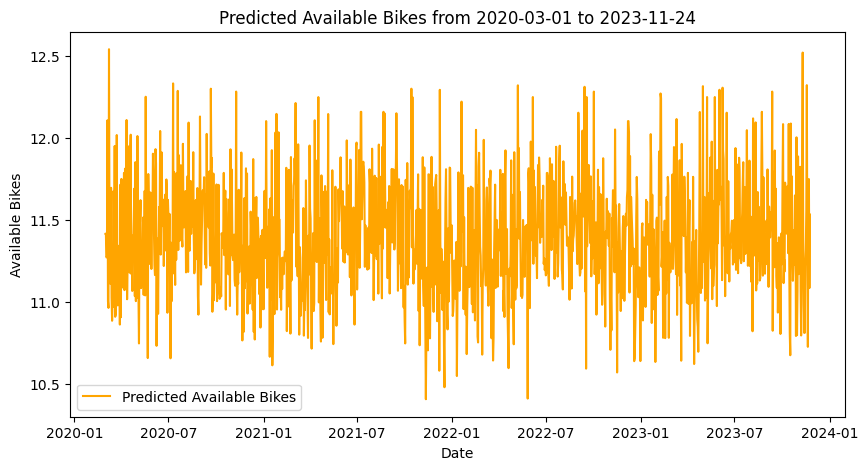

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'])
    # Ensure the date is set as the index
    data.set_index('DATE', inplace=True)
    return data

# Load the datasets
before_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')
all_data = pd.concat([before_pandemic_data, load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv'), load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')])

# Prepare data for modeling
# We will use 'temp' and 'windspeed' as additional features
features = ['temp', 'windspeed']
X = before_pandemic_data[features]
y = before_pandemic_data['AVAILABLE BIKES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict for the during and after pandemic periods
prediction_dates = all_data['2020-03-01':'2023-11-24'][features]
predicted_bikes = rf_model.predict(prediction_dates)

# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(all_data['2020-03-01':'2023-11-24'].index, predicted_bikes, label='Predicted Available Bikes', color='orange')
plt.title('Predicted Available Bikes from 2020-03-01 to 2023-11-24')
plt.xlabel('Date')
plt.ylabel('Available Bikes')
plt.legend()
plt.show()


4.4 LSTM model

c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\v

Epoch 1/5
528474/528474 [==============================] - 1300s 2ms/step - loss: 9.6483e-04
Epoch 2/5
528474/528474 [==============================] - 1381s 3ms/step - loss: 9.3705e-04
Epoch 3/5
528474/528474 [==============================] - 1469s 3ms/step - loss: 9.3488e-04
Epoch 4/5
528474/528474 [==============================] - 1291s 2ms/step - loss: 9.3412e-04
Epoch 5/5
528474/528474 [==============================] - 1579s 3ms/step - loss: 9.3366e-04


c:\Users\M2-Winterfell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


44/44 [==============================] - 1s 1ms/step


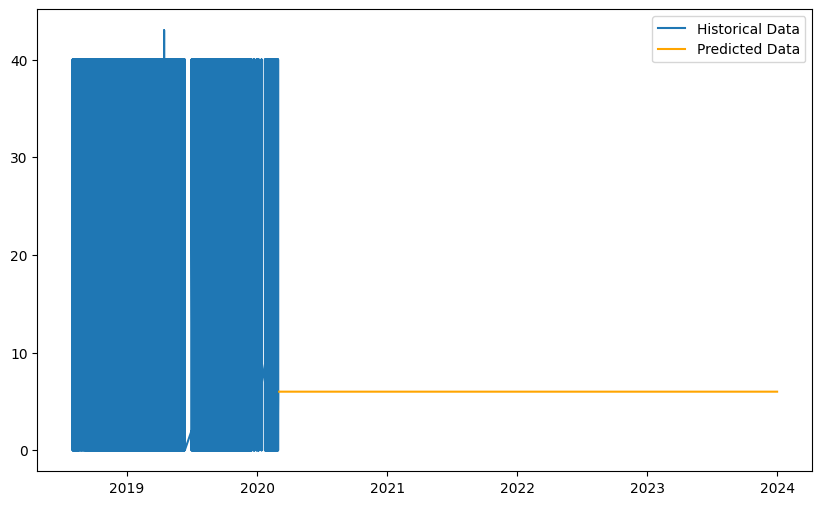

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to load and preprocess data
def load_preprocess_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'])
    data.set_index('DATE', inplace=True)
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['AVAILABLE BIKES', 'temp', 'windspeed']])
    return scaled_data, scaler, data

# Create dataset for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0])  # First column is 'AVAILABLE BIKES'
    return np.array(X), np.array(Y)

# Load and preprocess data
data, scaler, original_data = load_preprocess_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')

# Define look_back period
look_back = 3
X, Y = create_dataset(data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], look_back, X.shape[2]))

# Create and fit the LSTM network (simplified for quicker processing)
model = Sequential()
model.add(LSTM(32, input_shape=(look_back, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (reduced epochs for speed)
model.fit(X, Y, epochs=5, batch_size=32, verbose=1)

# Extrapolate features for future prediction (simplistic approach)
last_known_values = original_data.iloc[-1][['AVAILABLE BIKES', 'temp', 'windspeed']].values
last_known_date = original_data.index[-1]
future_dates = pd.date_range(start=last_known_date, end='2023-12-31', freq='D')
future_data = np.tile(last_known_values, (len(future_dates), 1))

# Scale the future data
scaled_future_data = scaler.transform(future_data)

# Create dataset for future prediction
X_future = np.array([scaled_future_data[i:i + look_back] for i in range(len(scaled_future_data) - look_back)])

# Reshape input
X_future = np.reshape(X_future, (X_future.shape[0], look_back, X_future.shape[2]))

# Predict future values
future_predictions = model.predict(X_future)
future_predictions = scaler.inverse_transform(np.hstack((future_predictions, np.zeros((future_predictions.shape[0], 2)))))[:, 0]

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(original_data.index, scaler.inverse_transform(data)[:,0], label='Historical Data')
plt.plot(future_dates[look_back:], future_predictions, label='Predicted Data', color='orange')
plt.legend()
plt.show()
